<a href="https://colab.research.google.com/github/haris-ali2/Multi-Class-Classification-with-CNNs/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, ZeroPadding2D, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt



## **A: Loading, Showing and Preprocessing the Data**

In [ ]:
#importing the fashion MNIST data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Checking the input shape

x_train.shape

(60000, 28, 28)

In [ ]:
#Reshaping into 4D because KERAS expexts 4D input

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# convert from integers to floats for KERAS

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Convert y datasets into one hot vectors' matrix representation
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

y_test1.shape

(10000, 10)

In [ ]:
#exracting the validation data which is 20% of the training data
x_train1, val_train, y_train1, val_test = train_test_split(x_train, y_train1, test_size = 0.2)

**Showing some examples from training set**

---



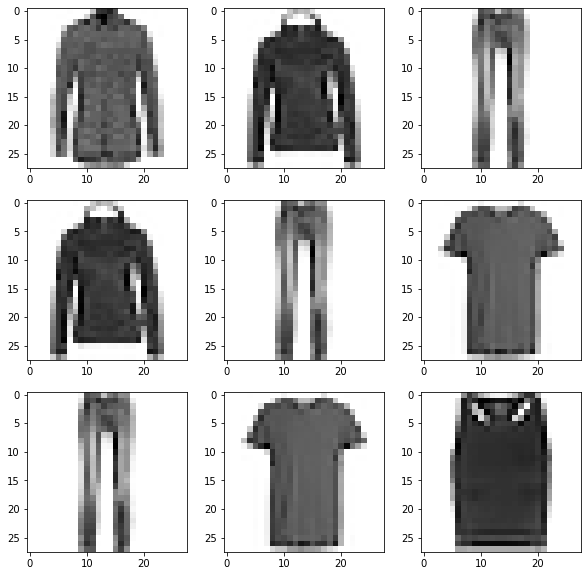

In [ ]:
#plotting some examples from the dataset

_, ax = plt.subplots(3,3, figsize = (10,10))
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(x_train[j+i+12000].reshape((28,28)), cmap = 'Greys')
plt.show()

## **B & C: CNN with learning rate 0.01 (softmax with MSE)**

### Creating the model

In [ ]:
#defining the model

cnn_model = Sequential([
                        Conv2D(filters = 8, strides = (2,2), kernel_size = 2, activation = 'relu'),
                        #(14x14x8)
                        MaxPool2D(pool_size = 2, strides = (1,1), padding = 'same'),
                        #(14x14x8)
                        ZeroPadding2D(padding = (1,1)),
                        Conv2D(filters = 32, kernel_size = 2, strides = (2,2), activation = 'relu'),
                        #(8x8x32)
                        Conv2D(filters = 64, kernel_size = 2, strides = (2,2), activation = 'relu'),
                        #(4x4x64)
                        Conv2D(filters = 128, kernel_size = 2, strides = (2,2), activation = 'relu'),
                        #(2x2x128)
                        Flatten(),
                        Dense(512, activation = 'relu'),
                        Dense(128, activation = 'relu'),
                        Dense(10, activation = 'softmax')
                      ])

In [ ]:
#compiling the model
cnn_model.compile(
                  loss = 'mean_squared_error',
                  optimizer = SGD(learning_rate = 0.01),
                  metrics = ['AUC']
                 )

In [ ]:
#training the model
history = cnn_model.fit(
              x_train1, y_train1, batch_size = 512, epochs = 50, verbose = 1,
              validation_data = (val_train, val_test), shuffle = True
             )

Epoch 1/50
94/94 [==============================] - 32s 26ms/step - loss: 0.0892 - auc: 0.6418 - val_loss: 0.0739 - val_auc: 0.7125
Epoch 2/50
94/94 [==============================] - 2s 21ms/step - loss: 0.0695 - auc: 0.7312 - val_loss: 0.0673 - val_auc: 0.7414
Epoch 3/50
94/94 [==============================] - 2s 20ms/step - loss: 0.0645 - auc: 0.7735 - val_loss: 0.0606 - val_auc: 0.8032
Epoch 4/50
94/94 [==============================] - 2s 20ms/step - loss: 0.0560 - auc: 0.8262 - val_loss: 0.0549 - val_auc: 0.8330
Epoch 5/50
94/94 [==============================] - 2s 21ms/step - loss: 0.0517 - auc: 0.8566 - val_loss: 0.0500 - val_auc: 0.8767
Epoch 6/50
94/94 [==============================] - 2s 20ms/step - loss: 0.0470 - auc: 0.8875 - val_loss: 0.0456 - val_auc: 0.8929
Epoch 7/50
94/94 [==============================] - 2s 20ms/step - loss: 0.0436 - auc: 0.8991 - val_loss: 0.0427 - val_auc: 0.9014
Epoch 8/50
94/94 [==============================] - 2s 20ms/step - loss: 0.0414 - 

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 8)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          1056      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         32896     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

### Plotting the Losses and accuracy of validation set

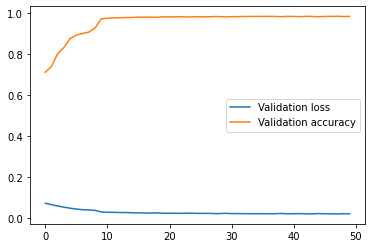

In [ ]:
plt.plot(range(50), history.history['val_loss'],label = 'Validation loss' )
plt.legend()
plt.plot(range(50), history.history['val_auc'],label = 'Validation accuracy')
plt.legend()
plt.show()

#**D: CNN (Softmax with categorical cross entropy)**

In [ ]:
#defining the model
cnn_model2 = Sequential([
                        Conv2D(filters = 8, strides = (2,2), kernel_size = 2, activation = 'relu'),
                        #(14x14x8)
                         MaxPool2D(pool_size = 2, strides = (1,1), padding = 'same'),
                        #(14x14x8)
                        ZeroPadding2D(padding = (1,1)),
                        Conv2D(filters = 32, kernel_size = 2, strides = (2,2), activation = 'relu'),
                        #(8x8x32)
                        Conv2D(filters = 64, kernel_size = 2, strides = (2,2), activation = 'relu'),
                        #(4x4x64)
                        Conv2D(filters = 128, kernel_size = 2, strides = (2,2), activation = 'relu'),
                        #(2x2x128)
                        Flatten(),
                        Dense(512, activation = 'relu'),
                        Dense(128, activation = 'relu'),
                        Dense(10, activation = 'softmax')
                      ])

#compiling the model
cnn_model2.compile(
                  loss = 'categorical_crossentropy',
                  optimizer = Adam(learning_rate = 0.01),
                  metrics = ['AUC']
                 )

#training the model
history2 = cnn_model2.fit(
              x_train1, y_train1, batch_size = 512, epochs = 50, verbose = 1,
              validation_data = (val_train, val_test), shuffle = True
             )

Epoch 1/50
94/94 [==============================] - 3s 25ms/step - loss: 1.6227 - auc: 0.9484 - val_loss: 0.5055 - val_auc: 0.9834
Epoch 2/50
94/94 [==============================] - 2s 21ms/step - loss: 0.4335 - auc: 0.9879 - val_loss: 0.4415 - val_auc: 0.9875
Epoch 3/50
94/94 [==============================] - 2s 21ms/step - loss: 0.3923 - auc: 0.9898 - val_loss: 0.4022 - val_auc: 0.9894
Epoch 4/50
94/94 [==============================] - 2s 21ms/step - loss: 0.3553 - auc: 0.9914 - val_loss: 0.3783 - val_auc: 0.9903
Epoch 5/50
94/94 [==============================] - 2s 21ms/step - loss: 0.3355 - auc: 0.9922 - val_loss: 0.3592 - val_auc: 0.9913
Epoch 6/50
94/94 [==============================] - 2s 21ms/step - loss: 0.3239 - auc: 0.9927 - val_loss: 0.3687 - val_auc: 0.9907
Epoch 7/50
94/94 [==============================] - 2s 21ms/step - loss: 0.3081 - auc: 0.9935 - val_loss: 0.3561 - val_auc: 0.9910
Epoch 8/50
94/94 [==============================] - 2s 21ms/step - loss: 0.2948 - a

In [ ]:
cnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 8)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          1056      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)         32896     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

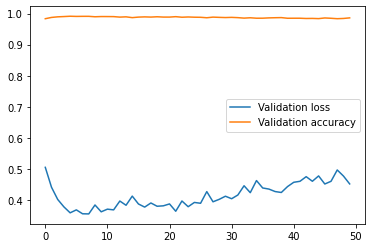

In [ ]:
#plotting the validation loss and accuracy

plt.plot(range(50), history2.history['val_loss'],label = 'Validation loss' )
plt.legend()
plt.plot(range(50), history2.history['val_auc'],label = 'Validation accuracy')
plt.legend()
plt.show()

# **E: Comparison**

###Confusion matrix of model with MSE

Confusion matrix: 
 [[783   6  14  43  16   5 113   1  18   1]
 [  8 934   4  38   7   1   6   0   2   0]
 [ 18   5 640  13 216   2  91   0  15   0]
 [ 31  32  11 840  45   1  38   0   2   0]
 [  2   1  45  30 860   0  55   0   7   0]
 [  0   0   0   1   0 926   0  46   5  22]
 [129   3  77  40 158   0 571   0  22   0]
 [  0   0   0   0   0  35   0 937   0  28]
 [  4   0   8   9   6   4  14   8 947   0]
 [  0   0   0   0   0  14   0  55   1 930]]


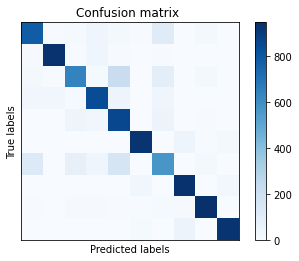

In [ ]:
y_pred1 = cnn_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred1.argmax(axis= 1))
print('Confusion matrix: \n',cm)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

###Confusion matrix of model with CCE

Confusion matrix: 
 [[849   4  14  34   1   0  92   0   6   0]
 [  1 970   0  20   3   0   5   0   1   0]
 [ 15   0 815  15  60   0  95   0   0   0]
 [ 26   8  11 932  14   0   8   0   1   0]
 [  2   0 125  55 759   0  57   0   2   0]
 [  0   0   2   0   0 936   1  33   7  21]
 [145   2 101  37  84   0 619   0  12   0]
 [  0   0   0   0   0  15   0 966   0  19]
 [  3   1   3   5   4   4   8   2 969   1]
 [  0   0   0   0   0   3   2  58   1 936]]


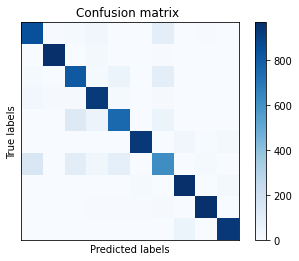

In [ ]:
y_pred2 = cnn_model2.predict(x_test)

cm = confusion_matrix(y_test, y_pred2.argmax(axis= 1))
print('Confusion matrix: \n',cm)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

#**F: ROC Curve for model in D**

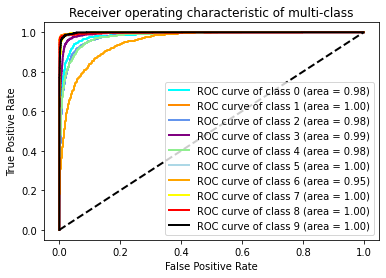

In [ ]:
from itertools import cycle

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


colors = cycle(['aqua', 'darkorange', 'cornflowerblue',"purple", "lightgreen", "lightblue", "orange", 'yellow', 'red', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1],'--k' ,lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multi-class')
plt.legend(loc="lower right")
plt.show()
